In [1]:
import numpy as np
from random import randint
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [16]:
data, classes = make_blobs(n_samples=1000, centers=2, random_state=42)

In [97]:
def closest_center(data, centers):
    temp = []
    
    for d in data:
        if np.linalg.norm(d - centers[0,:]) < np.linalg.norm(d - centers[1,:]):
            temp.append(0)
        else:
            temp.append(1)
    
    return np.array(temp)
            

/home/elmilanov/anaconda3/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:896: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


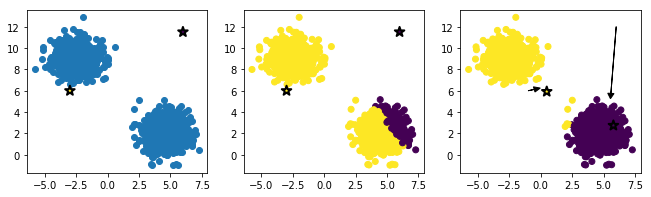

In [103]:
init_coord = np.array([[6,11.5], [-3,6]])

kmeans = KMeans(n_clusters=2, init=init_coord, max_iter=1, algorithm='full')
kmeans.fit(data)

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(11,3))

ax1.scatter(data[:,0], data[:,1])
ax1.scatter(init_coord[:,0], 
            init_coord[:,1], 
            c=[0,1],
            marker='*',
            s=100,
            linewidths=2,
            edgecolors='black')

ax2.scatter(data[:,0], data[:,1], c=closest_center(data, init_coord))
ax2.scatter(init_coord[:,0], 
            init_coord[:,1], 
            c=[0,1],
            marker='*',
            s=100,
            linewidths=2,
            edgecolors='black')


ax3.scatter(data[:,0], data[:,1], c=kmeans.labels_)
ax3.arrow(6, 12, kmeans.cluster_centers_[0,0] - 6.2, kmeans.cluster_centers_[0,1] - 9, head_width=0.5, head_length=0.5, fc='k', ec='k')
ax3.arrow(-1, 6, kmeans.cluster_centers_[1,0], kmeans.cluster_centers_[1,1] - 5.8, head_width=0.5, head_length=0.5, fc='k', ec='k')
ax3.scatter(kmeans.cluster_centers_[:,0],
            kmeans.cluster_centers_[:,1],
            c=[0,1],
            marker='*',
            s=100,
            linewidths=2,
            edgecolors='black')
plt.show()